# Visualize TEMPO and GEMS output 
## Part 1 - set up scenario parameters and load inputs

In [1]:
# load packages
import os
os.environ['USE_PYGEOS'] = '0'
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import shapely.wkt
import geopandas as gpd
import contextily as cx
import matplotlib
import warnings
from  matplotlib.ticker import PercentFormatter
# from rasterio.crs import CRS
warnings.filterwarnings("ignore")
#work directory is where the I-O data are stored
work_dir = '/Users/xiaodanxu/Library/CloudStorage/GoogleDrive-arielinseu@gmail.com/My Drive/GEMS/BILD-AQ/deliverables'
os.chdir(work_dir)

plt.style.use('ggplot')
sns.set(font_scale=1.2)  # larger font

# check color from default color palette
# pal = sns.color_palette()
# print(pal.as_hex())
# sns.color_palette()

<Axes: >

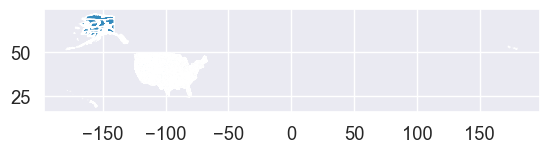

In [2]:
# prepare input and parameters
selected_states = ['CA', 'OR', 'WA']
dac_designation = read_csv('Network/Joint_office_DAC_lookup.csv')

state_id_file = 'Network/ccst_geoid_key_transp_geo_with_imputation.csv'
state_id_lookup = read_csv(state_id_file)

# generate map visualization
us_tract_file = 'Network/census_tracts_2017.geojson'
us_tracts_geojson =  gpd.read_file(us_tract_file) # load shapefile of CA tracts
us_tracts_geojson.loc[:, 'home_GEOID'] = us_tracts_geojson.loc[:, 'GEOID'].astype(int)
# CA_tracts_geojson.loc[:, 'home_GEOID'] = CA_tracts_geojson.loc[:, 'GEOID'].astype(str).str.zfill(0)
#CA_tracts_geojson.head(5)
us_tracts_geojson.plot()

In [3]:
# load EV penetration
EV_penetration_by_scenario = None
scenario_name_lookup = {'Baseline': 'Baseline', 'NEVI': 'NEVI'} 
#                         'Bookend': 'Bookend'}
analysis_year = 2032
scenarios = list(scenario_name_lookup.keys())

for selected_state in selected_states:
    EV_penetration_dir = 'Output/' + selected_state + '/EV_penetration/'
    list_of_ev_penetration = os.listdir('Output/' + selected_state + '/EV_penetration')
    
    for scenario in scenarios:
    #     print(file)
        file_name = 'EV_penetration_' + selected_state + '_' + \
        str(analysis_year) + '_' + scenario + '.csv'

        scenario_output = 'Year ' + str(analysis_year) + ' ' + scenario_name_lookup[scenario]
    #     print(scenario_output)
        ev_penetration = read_csv(EV_penetration_dir + '/' + file_name)
        ev_penetration.loc[:, 'scenario'] = scenario_output
        ev_penetration.loc[:, 'year'] = analysis_year
        ev_penetration.loc[:, 'state'] = selected_state
        ev_penetration.loc[:, 'type'] = scenario_name_lookup[scenario]

        EV_penetration_by_scenario = pd.concat([EV_penetration_by_scenario, ev_penetration])
    #     break
#     EV_penetration_by_scenario.head(5)    

EV_penetration_by_scenario.loc[:, 'EV_count'] = EV_penetration_by_scenario.loc[:, 'Total'] * \
(EV_penetration_by_scenario.loc[:, 'BEV_100'] + EV_penetration_by_scenario.loc[:, 'BEV_300'] + \
 EV_penetration_by_scenario.loc[:, 'FCEV'] + \
EV_penetration_by_scenario.loc[:, 'PHEV_25'] + EV_penetration_by_scenario.loc[:, 'PHEV_50'])
print(EV_penetration_by_scenario.scenario.unique())
EV_penetration_by_scenario.head(5)

['Year 2032 Baseline' 'Year 2032 NEVI']


,home_GEOID,BEV_100,BEV_300,FCEV,HEV_Gasoline,ICEV_Gasoline,ICEV_NG,PHEV_25,PHEV_50,Total,scenario,year,state,type,EV_count
0,6001400100,0.028635,0.268533,0.000636,0.035317,0.644289,0.000636,0.007000,0.014954,3143.0,Year 2032 Baseline,2032,CA,Baseline,1005.0
1,6001400200,0.029372,0.269025,0.000668,0.035381,0.644860,0.000000,0.006008,0.014686,1498.0,Year 2032 Baseline,2032,CA,Baseline,479.0
2,6001400300,0.028993,0.268566,0.000763,0.035097,0.644456,0.000509,0.006867,0.014751,3932.0,Year 2032 Baseline,2032,CA,Baseline,1258.0
3,6001400400,0.028940,0.268828,0.000697,0.035216,0.644351,0.000697,0.006625,0.014644,2868.0,Year 2032 Baseline,2032,CA,Baseline,917.0
4,6001400500,0.028832,0.268589,0.000759,0.034901,0.644917,0.000759,0.006829,0.014416,2636.0,Year 2032 Baseline,2032,CA,Baseline,842.0


In [4]:
EV_VMT_by_scenario = None
scenarios = list(scenario_name_lookup.keys())
for selected_state in selected_states:
    EV_penetration_dir = 'Output/' + selected_state + '/EV_VMT/'
    list_of_ev_vmt = os.listdir('Output/' + selected_state + '/EV_VMT')
    for scenario in scenarios:
    #     print(file)
        file_name = 'raw_VMT_' + selected_state + '_' + \
        str(analysis_year) + '_' + scenario + '.csv'

        scenario_output = 'Year ' + str(analysis_year) + ' ' + scenario_name_lookup[scenario]
    #     print(scenario_output)
        ev_vmt = read_csv(EV_penetration_dir + '/' + file_name)
        ev_vmt.loc[:, 'scenario'] = scenario_output
        ev_vmt.loc[:, 'year'] = analysis_year
#         ev_vmt.loc[:, 'state'] = selected_state
        ev_vmt.loc[:, 'type'] = scenario_name_lookup[scenario]
        EV_VMT_by_scenario = pd.concat([EV_VMT_by_scenario, ev_vmt])
#     break
print(EV_VMT_by_scenario.scenario.unique())
EV_VMT_by_scenario.head(5)    

['Year 2032 Baseline' 'Year 2032 NEVI']


,thru_GEOID,thru_geotype,thru_microtype,BEV_100,BEV_300,FCEV,HEV_Gasoline,ICEV_Gasoline,ICEV_NG,PHEV_25,PHEV_50,VMT,scenario,year,type
0,4001942600,C,6.0,777.394185,9140.699359,22.113611,840.224249,21849.619129,11.279983,142.053455,494.739830,33278.123801,Year 2032 Baseline,2032,Baseline
1,4001942700,C,6.0,1866.416005,21947.822715,53.183011,2019.188583,52485.722351,26.820977,342.451392,1188.195016,79929.800049,Year 2032 Baseline,2032,Baseline
2,4001944000,C,5.0,149.366394,1743.225881,4.034713,160.522494,4121.212651,1.969913,27.020124,93.064996,6300.417166,Year 2032 Baseline,2032,Baseline
3,4001944100,C,5.0,485.357214,5702.197685,13.697735,524.570506,13616.439645,6.874095,88.591955,308.336593,20746.065428,Year 2032 Baseline,2032,Baseline
4,4001944201,C,6.0,740.686549,8722.759131,21.308717,801.802946,20905.323954,11.072544,135.653904,473.644168,31812.251914,Year 2032 Baseline,2032,Baseline


In [5]:
group_var = ['thru_GEOID', 'thru_geotype', 'thru_microtype', 'scenario', 'year', 'type']
EV_VMT_by_scenario = EV_VMT_by_scenario.groupby(group_var).sum()
EV_VMT_by_scenario = EV_VMT_by_scenario.reset_index()
EV_VMT_by_scenario.head(5)

,thru_GEOID,thru_geotype,thru_microtype,scenario,year,type,BEV_100,BEV_300,FCEV,HEV_Gasoline,ICEV_Gasoline,ICEV_NG,PHEV_25,PHEV_50,VMT
0,4001942600,C,6.0,Year 2032 Baseline,2032,Baseline,777.394185,9140.699359,22.113611,840.224249,21849.619129,11.279983,142.053455,494.739830,33278.123801
1,4001942600,C,6.0,Year 2032 NEVI,2032,NEVI,819.458557,9449.855451,22.110249,817.976782,21531.303320,11.279538,137.291649,488.848256,33278.123801
2,4001942700,C,6.0,Year 2032 Baseline,2032,Baseline,1866.416005,21947.822715,53.183011,2019.188583,52485.722351,26.820977,342.451392,1188.195016,79929.800049
3,4001942700,C,6.0,Year 2032 NEVI,2032,NEVI,1968.199868,22687.405704,53.174481,1964.445911,51724.074045,26.819712,331.303807,1174.376523,79929.800049
4,4001944000,C,5.0,Year 2032 Baseline,2032,Baseline,149.366394,1743.225881,4.034713,160.522494,4121.212651,1.969913,27.020124,93.064996,6300.417166


In [6]:
# append state and cbsa
state_id_lookup.head(5)
state_lookup = state_id_lookup[['GEOID', 'st_code', 'cbsa']]
EV_VMT_by_scenario = pd.merge(EV_VMT_by_scenario, state_lookup,
                             left_on = 'thru_GEOID', right_on = 'GEOID', how = 'left')

EV_VMT_by_scenario = EV_VMT_by_scenario.drop(columns = 'GEOID')
EV_VMT_by_scenario = EV_VMT_by_scenario.rename(columns = {'st_code':'state'})

state_lookup = state_id_lookup[['GEOID', 'cbsa']]
EV_penetration_by_scenario = pd.merge(EV_penetration_by_scenario, state_lookup,
                             left_on = 'home_GEOID', right_on = 'GEOID', how = 'left')
EV_penetration_by_scenario = EV_penetration_by_scenario.drop(columns = 'GEOID')
EV_penetration_by_scenario.head(5)

,home_GEOID,BEV_100,BEV_300,FCEV,HEV_Gasoline,ICEV_Gasoline,ICEV_NG,PHEV_25,PHEV_50,Total,scenario,year,state,type,EV_count,cbsa
0,6001400100,0.028635,0.268533,0.000636,0.035317,0.644289,0.000636,0.007000,0.014954,3143.0,Year 2032 Baseline,2032,CA,Baseline,1005.0,41860.0
1,6001400200,0.029372,0.269025,0.000668,0.035381,0.644860,0.000000,0.006008,0.014686,1498.0,Year 2032 Baseline,2032,CA,Baseline,479.0,41860.0
2,6001400300,0.028993,0.268566,0.000763,0.035097,0.644456,0.000509,0.006867,0.014751,3932.0,Year 2032 Baseline,2032,CA,Baseline,1258.0,41860.0
3,6001400400,0.028940,0.268828,0.000697,0.035216,0.644351,0.000697,0.006625,0.014644,2868.0,Year 2032 Baseline,2032,CA,Baseline,917.0,41860.0
4,6001400500,0.028832,0.268589,0.000759,0.034901,0.644917,0.000759,0.006829,0.014416,2636.0,Year 2032 Baseline,2032,CA,Baseline,842.0,41860.0


In [7]:
# attach DAC attribute
print(dac_designation.columns)

dac_designation_short = dac_designation[['GEOID', 'POPULATION', 'NEVI_DAC']]
dac_designation_short.head(4)

EV_penetration_by_scenario = pd.merge(EV_penetration_by_scenario, 
                                      dac_designation_short,
                                      left_on = 'home_GEOID', 
                                      right_on = 'GEOID',
                                      how = 'left')

EV_VMT_by_scenario = pd.merge(EV_VMT_by_scenario, dac_designation_short,
                              left_on = 'thru_GEOID', 
                              right_on = 'GEOID',
                              how = 'left')

EV_VMT_by_scenario.head(5)

Index(['GEOID', 'CITY', 'COUNTY', 'STATEABB', 'COUNTYFIPS', 'CBSA', 'CBSANAME',
       'STATEFIPS', 'POPULATION', 'DOE_DAC',
       ...
       'EconomyDis', 'EquityDis', 'Resilien_1', 'EnviroDis', 'SumDis',
       'DOT_DAC', 'Shape_Leng', 'Shape_Area', 'Count', 'NEVI_DAC'],
      dtype='object', length=129)


,thru_GEOID,thru_geotype,thru_microtype,scenario,year,type,BEV_100,BEV_300,FCEV,HEV_Gasoline,ICEV_Gasoline,ICEV_NG,PHEV_25,PHEV_50,VMT,state,cbsa,GEOID,POPULATION,NEVI_DAC
0,4001942600,C,6.0,Year 2032 Baseline,2032,Baseline,777.394185,9140.699359,22.113611,840.224249,21849.619129,11.279983,142.053455,494.739830,33278.123801,AZ,99999,4001942600,1742.0,1.0
1,4001942600,C,6.0,Year 2032 NEVI,2032,NEVI,819.458557,9449.855451,22.110249,817.976782,21531.303320,11.279538,137.291649,488.848256,33278.123801,AZ,99999,4001942600,1742.0,1.0
2,4001942700,C,6.0,Year 2032 Baseline,2032,Baseline,1866.416005,21947.822715,53.183011,2019.188583,52485.722351,26.820977,342.451392,1188.195016,79929.800049,AZ,99999,4001942700,5345.0,1.0
3,4001942700,C,6.0,Year 2032 NEVI,2032,NEVI,1968.199868,22687.405704,53.174481,1964.445911,51724.074045,26.819712,331.303807,1174.376523,79929.800049,AZ,99999,4001942700,5345.0,1.0
4,4001944000,C,5.0,Year 2032 Baseline,2032,Baseline,149.366394,1743.225881,4.034713,160.522494,4121.212651,1.969913,27.020124,93.064996,6300.417166,AZ,99999,4001944000,6547.0,1.0


In [9]:
# post-process EV VMT results
EV_VMT_by_scenario.loc[:, 'ICEV_VMT'] = EV_VMT_by_scenario.loc[:, 'HEV_Gasoline'] + \
EV_VMT_by_scenario.loc[:, 'ICEV_Gasoline'] + EV_VMT_by_scenario.loc[:, 'ICEV_NG'] + \
0.78 * EV_VMT_by_scenario.loc[:, 'PHEV_25'] + 0.38 * EV_VMT_by_scenario.loc[:, 'PHEV_50'] 

EV_VMT_by_scenario.loc[:, 'BEV_VMT'] = EV_VMT_by_scenario.loc[:, 'BEV_100'] + \
EV_VMT_by_scenario.loc[:, 'BEV_300'] + EV_VMT_by_scenario.loc[:, 'FCEV'] + \
0.22 * EV_VMT_by_scenario.loc[:, 'PHEV_25'] + 0.62 * EV_VMT_by_scenario.loc[:, 'PHEV_50'] 

EV_VMT_by_scenario.loc[:, 'ICEV_VMT_fraction'] = EV_VMT_by_scenario.loc[:, 'ICEV_VMT'] / \
EV_VMT_by_scenario.loc[:, 'VMT']

EV_VMT_by_scenario.loc[:, 'BEV_VMT_fraction'] = EV_VMT_by_scenario.loc[:, 'BEV_VMT'] / \
EV_VMT_by_scenario.loc[:, 'VMT']

EV_VMT_by_scenario.head(5)

,thru_GEOID,thru_geotype,thru_microtype,scenario,year,type,BEV_100,BEV_300,FCEV,HEV_Gasoline,...,VMT,state,cbsa,GEOID,POPULATION,NEVI_DAC,ICEV_VMT,BEV_VMT,ICEV_VMT_fraction,BEV_VMT_fraction
0,4001942600,C,6.0,Year 2032 Baseline,2032,Baseline,777.394185,9140.699359,22.113611,840.224249,...,33278.123801,AZ,99999,4001942600,1742.0,1.0,22999.926192,10278.197609,0.691143,0.308857
1,4001942600,C,6.0,Year 2032 NEVI,2032,NEVI,819.458557,9449.855451,22.110249,817.976782,...,33278.123801,AZ,99999,4001942600,1742.0,1.0,22653.409463,10624.714338,0.680730,0.319270
2,4001942700,C,6.0,Year 2032 Baseline,2032,Baseline,1866.416005,21947.822715,53.183011,2019.188583,...,79929.800049,AZ,99999,4001942700,5345.0,1.0,55250.358102,24679.441947,0.691236,0.308764
3,4001942700,C,6.0,Year 2032 NEVI,2032,NEVI,1968.199868,22687.405704,53.174481,1964.445911,...,79929.800049,AZ,99999,4001942700,5345.0,1.0,54420.019715,25509.780334,0.680848,0.319152
4,4001944000,C,5.0,Year 2032 Baseline,2032,Baseline,149.366394,1743.225881,4.034713,160.522494,...,6300.417166,AZ,99999,4001944000,6547.0,1.0,4340.145453,1960.271713,0.688866,0.311134


# PART 2 -- Generation bar charts

In [8]:
# plot the change of VMT
# EV_VMT_by_scenario.head(5)
EV_VMT_comparison = EV_VMT_by_scenario.groupby(['type'])[['BEV_VMT']].sum()
# pd.pivot_table(EV_VMT_by_scenario, values='BEV_VMT', 
#                                    index=['year'], 
#                                    columns=['type'], aggfunc=np.sum, 
#                                    fill_value=0)
EV_VMT_comparison = EV_VMT_comparison.reset_index()
EV_VMT_comparison.head(5)
EV_VMT_comparison.loc[:, 'VMT change'] = 0

EV_VMT_comparison.loc[EV_VMT_comparison['type'] == 'NEVI', 'VMT change'] = \
float(EV_VMT_comparison.loc[EV_VMT_comparison['type'] == 'NEVI', 'BEV_VMT']) - \
float(EV_VMT_comparison.loc[EV_VMT_comparison['type'] == 'Baseline', 'BEV_VMT'])

EV_VMT_comparison.loc[EV_VMT_comparison['type'] == 'Bookend', 'VMT change'] = \
float(EV_VMT_comparison.loc[EV_VMT_comparison['type'] == 'Bookend', 'BEV_VMT']) - \
float(EV_VMT_comparison.loc[EV_VMT_comparison['type'] == 'Baseline', 'BEV_VMT'])

EV_VMT_comparison = EV_VMT_comparison.loc[EV_VMT_comparison['type'] != 'Baseline']
EV_VMT_comparison = EV_VMT_comparison.sort_values(by = 'type', ascending = False)

sns.barplot(x = "type", y = "VMT change", data = EV_VMT_comparison, 
            color = '#5797af', alpha = 1)
# # plt.title('EV VMT difference (scenario - baseline)')
plt.xticks(rotation = 30)
plt.xlabel('Scenario')
plt.ylabel('EV VMT Changes (alt - base)')
plt.savefig('Plot/' + selected_state + '/' + selected_state + '_EV_VMT_delta_JUST8.png', 
            dpi = 200, bbox_inches = 'tight')
# # plt.show()
EV_VMT_comparison.head(5)

TypeError: cannot convert the series to <class 'float'>

In [7]:
# plot the change of VMT fraction

VMT_comparison = EV_VMT_by_scenario.groupby(['type'])[['BEV_VMT', 'VMT']].sum()
# pd.pivot_table(EV_VMT_by_scenario, values='BEV_VMT', 
#                                    index=['year'], 
#                                    columns=['type'], aggfunc=np.sum, 
#                                    fill_value=0)
VMT_comparison = VMT_comparison.reset_index()
VMT_comparison.loc[:, 'VMT fraction'] = \
VMT_comparison.loc[:, 'BEV_VMT'] / VMT_comparison.loc[:, 'VMT']
VMT_comparison.loc[:, 'VMT frac change'] = 0

VMT_comparison.loc[VMT_comparison['type'] == 'NEVI', 'VMT frac change'] = \
float(VMT_comparison.loc[VMT_comparison['type'] == 'NEVI', 'VMT fraction']) - \
float(VMT_comparison.loc[VMT_comparison['type'] == 'Baseline', 'VMT fraction'])

VMT_comparison.loc[VMT_comparison['type'] == 'Bookend', 'VMT frac change'] = \
float(VMT_comparison.loc[VMT_comparison['type'] == 'Bookend', 'VMT fraction']) - \
float(VMT_comparison.loc[VMT_comparison['type'] == 'Baseline', 'VMT fraction'])

VMT_comparison = VMT_comparison.loc[VMT_comparison['type'] != 'Baseline']
VMT_comparison = VMT_comparison.sort_values(by = 'type', ascending = False)

ax = sns.barplot(x = "type", y = "VMT frac change", data = VMT_comparison, 
            color = '#5797af', alpha = 1)
# # plt.title('EV VMT difference (scenario - baseline)')
plt.xticks(rotation = 30)
plt.xlabel('Scenario')
plt.ylabel('EV VMT Penetration Changes (alt - base)')
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
plt.savefig('Plot/' + selected_state + '/' + selected_state + '_EV_VMT_frac_delta_JUST8.png', 
            dpi = 200, bbox_inches = 'tight')



TypeError: cannot convert the series to <class 'float'>

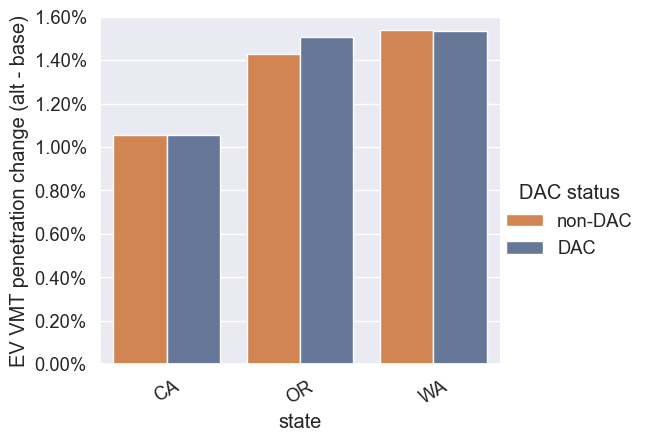

,state,DAC status,EV VMT baseline,EV VMT scenario,VMT baseline,VMT scenario,EV penetration baseline,EV penetration scenario,VMT penetration change
2,CA,non-DAC,1.149644e+08,1.187988e+08,3.630743e+08,3.630743e+08,0.316641,0.327203,0.010561
3,CA,DAC,1.409247e+08,1.456091e+08,4.435228e+08,4.435228e+08,0.317739,0.328301,0.010562
10,OR,non-DAC,1.286956e+07,1.352017e+07,4.550232e+07,4.550232e+07,0.282833,0.297131,0.014298
11,OR,DAC,8.914557e+06,9.388316e+06,3.144495e+07,3.144495e+07,0.283497,0.298564,0.015066
14,WA,non-DAC,2.353240e+07,2.487328e+07,8.717856e+07,8.717856e+07,0.269933,0.285314,0.015381
15,WA,DAC,1.549086e+07,1.637410e+07,5.747636e+07,5.747636e+07,0.269517,0.284884,0.015367


In [34]:
# Plot the VMT fraction changes by dac
VMT_comparison_by_dac = \
pd.pivot_table(EV_VMT_by_scenario, values=['BEV_VMT', 'VMT'], 
               index=['state', 'NEVI_DAC'], 
               columns=['type'], aggfunc=np.sum, fill_value=0)
VMT_comparison_by_dac = VMT_comparison_by_dac.reset_index()
VMT_comparison_by_dac.columns = ['state', 'DAC status', 'EV VMT baseline', 'EV VMT scenario', 
                                 'VMT baseline', 'VMT scenario']

VMT_comparison_by_dac['EV penetration baseline'] = VMT_comparison_by_dac['EV VMT baseline'] / \
VMT_comparison_by_dac['VMT baseline']
VMT_comparison_by_dac['EV penetration scenario'] = VMT_comparison_by_dac['EV VMT scenario'] / \
VMT_comparison_by_dac['VMT scenario']

VMT_comparison_by_dac['VMT penetration change'] = VMT_comparison_by_dac['EV penetration scenario'] - \
VMT_comparison_by_dac['EV penetration baseline']
# VMT_comparison_by_dac['EV penetration non-DAC'] = VMT_comparison_by_dac['BEV VMT non-DAC'] / \
# VMT_comparison_by_dac['VMT non-DAC']
# VMT_comparison_by_dac['EV penetration DAC'] = VMT_comparison_by_dac['BEV VMT DAC'] / \
# VMT_comparison_by_dac['VMT DAC']

# VMT_comparison_by_dac['non-DAC'] = 0
# VMT_comparison_by_dac.loc[VMT_comparison_by_dac['type'] == 'NEVI', 'non-DAC'] = \
# float(VMT_comparison_by_dac.loc[VMT_comparison_by_dac['type'] == 'NEVI', 'EV penetration non-DAC']) - \
# float(VMT_comparison_by_dac.loc[VMT_comparison_by_dac['type'] == 'Baseline', 'EV penetration non-DAC'])

# # VMT_comparison_by_dac.loc[VMT_comparison_by_dac['type'] == 'Bookend', 'non-DAC'] = \
# # float(VMT_comparison_by_dac.loc[VMT_comparison_by_dac['type'] == 'Bookend', 'EV penetration non-DAC']) - \
# # float(VMT_comparison_by_dac.loc[VMT_comparison_by_dac['type'] == 'Baseline', 'EV penetration non-DAC'])

# VMT_comparison_by_dac['DAC'] = 0
# VMT_comparison_by_dac.loc[VMT_comparison_by_dac['type'] == 'NEVI', 'DAC'] = \
# float(VMT_comparison_by_dac.loc[VMT_comparison_by_dac['type'] == 'NEVI', 'EV penetration DAC']) - \
# float(VMT_comparison_by_dac.loc[VMT_comparison_by_dac['type'] == 'Baseline', 'EV penetration DAC'])

# # VMT_comparison_by_dac.loc[VMT_comparison_by_dac['type'] == 'Bookend', 'DAC'] = \
# # float(VMT_comparison_by_dac.loc[VMT_comparison_by_dac['type'] == 'Bookend', 'EV penetration DAC']) - \
# # float(VMT_comparison_by_dac.loc[VMT_comparison_by_dac['type'] == 'Baseline', 'EV penetration DAC'])

# VMT_comparison_by_dac = VMT_comparison_by_dac.loc[VMT_comparison_by_dac['type'] != 'Baseline']
# VMT_comparison_by_dac = VMT_comparison_by_dac.sort_values(by = 'type', ascending = False)

# VMT_comparison_by_dac = pd.melt(VMT_comparison_by_dac, 
#                                 id_vars=['state', 'type'], 
#                                 value_vars=['DAC', 'non-DAC'],
#                                 var_name='DAC status', 
#                                 value_name='VMT penetration change')
# Create an array with the colors you want to use
colors = ["#e7803e", "#5f74a0"]
dac_lookup = {0: 'non-DAC', 1: 'DAC'}
VMT_comparison_by_dac = VMT_comparison_by_dac.loc[VMT_comparison_by_dac['state'].isin(selected_states)]
VMT_comparison_by_dac['DAC status'] = VMT_comparison_by_dac['DAC status'].astype(int)
VMT_comparison_by_dac['DAC status'] = VMT_comparison_by_dac['DAC status'].map(dac_lookup)
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
# plt.figure(figsize = (5, 10))
ax = sns.catplot(kind = 'bar', data = VMT_comparison_by_dac,
            x = 'state', y = 'VMT penetration change', 
#             color = '#5797af', 
                 hue = 'DAC status',
            height=4.5, aspect=1.2)
plt.xticks(rotation = 30)
# plt.xlabel('Scenario')
plt.ylabel('EV VMT penetration change (alt - base)')
# plt.ylim([0, 0.05])
for ax in ax.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim([0, 0.016])
plt.savefig('Plot/PNW/three_states_EV_VMT_frac_by_dac_delta.png', dpi = 200, bbox_inches = 'tight')
plt.show()

VMT_comparison_by_dac.to_csv('Output/PNW/agg_EV_VMT_frac.csv')
VMT_comparison_by_dac.head(6)

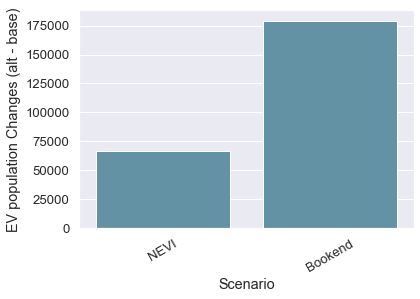

In [10]:
# Plot EV population changes

EV_pop_comparison = EV_penetration_by_scenario.groupby(['type'])[['EV_count']].sum()
# pd.pivot_table(EV_VMT_by_scenario, values='BEV_VMT', 
#                                    index=['year'], 
#                                    columns=['type'], aggfunc=np.sum, 
#                                    fill_value=0)
EV_pop_comparison = EV_pop_comparison.reset_index()
EV_pop_comparison.head(5)
EV_pop_comparison.loc[:, 'population change'] = 0

EV_pop_comparison.loc[EV_pop_comparison['type'] == 'NEVI', 'population change'] = \
float(EV_pop_comparison.loc[EV_pop_comparison['type'] == 'NEVI', 'EV_count']) - \
float(EV_pop_comparison.loc[EV_pop_comparison['type'] == 'Baseline', 'EV_count'])

EV_pop_comparison.loc[EV_pop_comparison['type'] == 'Bookend', 'population change'] = \
float(EV_pop_comparison.loc[EV_pop_comparison['type'] == 'Bookend', 'EV_count']) - \
float(EV_pop_comparison.loc[EV_pop_comparison['type'] == 'Baseline', 'EV_count'])

EV_pop_comparison = EV_pop_comparison.loc[EV_pop_comparison['type'] != 'Baseline']
EV_pop_comparison = EV_pop_comparison.sort_values(by = 'type', ascending = False)

sns.barplot(x = "type", y = "population change", data = EV_pop_comparison, 
            color = '#5797af', alpha = 1)
# # plt.title('EV VMT difference (scenario - baseline)')
plt.xticks(rotation = 30)
plt.xlabel('Scenario')
plt.ylabel('EV population Changes (alt - base)')
plt.savefig('Plot/' + selected_state + '/' + selected_state + '_EV_population_delta_JUST8.png', 
            dpi = 200, bbox_inches = 'tight')

In [11]:
# plot EV penetration change

population_comparison = \
EV_penetration_by_scenario.groupby(['type'])[['EV_count', 'Total']].sum()

population_comparison = population_comparison.reset_index()
population_comparison.loc[:, 'EV fraction'] = \
population_comparison.loc[:, 'EV_count'] / population_comparison.loc[:, 'Total']
population_comparison.loc[:, 'EV frac change'] = 0

population_comparison.loc[population_comparison['type'] == 'NEVI', 'EV frac change'] = \
float(population_comparison.loc[population_comparison['type'] == 'NEVI', 'EV fraction']) - \
float(population_comparison.loc[population_comparison['type'] == 'Baseline', 'EV fraction'])

population_comparison.loc[population_comparison['type'] == 'Bookend', 'EV frac change'] = \
float(population_comparison.loc[population_comparison['type'] == 'Bookend', 'EV fraction']) - \
float(population_comparison.loc[population_comparison['type'] == 'Baseline', 'EV fraction'])

population_comparison = population_comparison.loc[population_comparison['type'] != 'Baseline']
population_comparison = population_comparison.sort_values(by = 'type', ascending = False)

ax = sns.barplot(x = "type", y = "EV frac change", data = population_comparison, 
            color = '#5797af', alpha = 1)
# # plt.title('EV VMT difference (scenario - baseline)')
plt.xticks(rotation = 30)
plt.xlabel('Scenario')
plt.ylabel('EV Adoption Changes (alt - base)')
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
plt.savefig('Plot/' + selected_state + '/' + selected_state + '_EV_population_frac_delta_JUST8.png', 
            dpi = 200, bbox_inches = 'tight')



TypeError: cannot convert the series to <class 'float'>

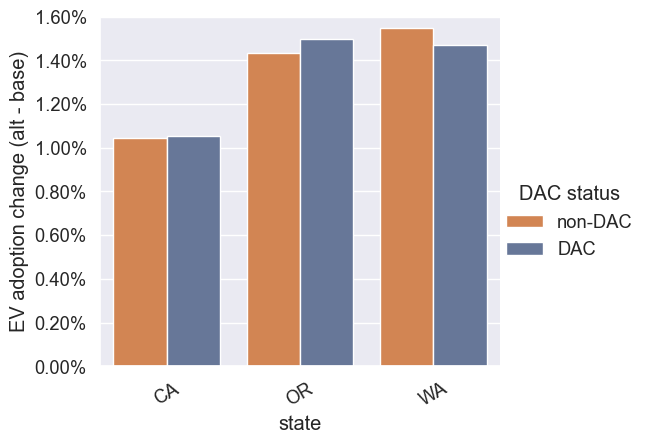

,state,DAC status,EV baseline,EV scenario,Total baseline,Total scenario,EV penetration baseline,EV penetration scenario,EV adoption change
0,CA,non-DAC,4766274.0,4918175.0,14566329.0,14566255.0,0.327212,0.337642,0.010430
1,CA,DAC,4822518.0,4977777.0,14738745.0,14738805.0,0.327200,0.337733,0.010533
2,OR,non-DAC,658618.0,690732.0,2242309.0,2242313.0,0.293723,0.308044,0.014321
3,OR,DAC,348380.0,366291.0,1193254.0,1193346.0,0.291958,0.306945,0.014987
4,WA,non-DAC,1174082.0,1238605.0,4173004.0,4172908.0,0.281352,0.296821,0.015469
5,WA,DAC,530135.0,558125.0,1902363.0,1902383.0,0.278672,0.293382,0.014710


In [32]:
# Plot the ev penetration changes by dac

EV_frac_comparison_by_dac = \
pd.pivot_table(EV_penetration_by_scenario, values=['EV_count', 'Total'], 
               index=['state', 'NEVI_DAC'], 
               columns=['type'], aggfunc=np.sum, fill_value=0)
EV_frac_comparison_by_dac = EV_frac_comparison_by_dac.reset_index()
EV_frac_comparison_by_dac.columns = ['state', 'DAC status', 'EV baseline', 
                                 'EV scenario', 'Total baseline', 'Total scenario']

EV_frac_comparison_by_dac['EV penetration baseline'] = EV_frac_comparison_by_dac['EV baseline'] / \
EV_frac_comparison_by_dac['Total baseline']
EV_frac_comparison_by_dac['EV penetration scenario'] = EV_frac_comparison_by_dac['EV scenario'] / \
EV_frac_comparison_by_dac['Total scenario']

EV_frac_comparison_by_dac['EV adoption change'] = EV_frac_comparison_by_dac['EV penetration scenario'] - \
EV_frac_comparison_by_dac['EV penetration baseline']
# EV_frac_comparison_by_dac['EV adoption non-DAC'] = EV_frac_comparison_by_dac['BEV pop non-DAC'] / \
# EV_frac_comparison_by_dac['pop non-DAC']
# EV_frac_comparison_by_dac['EV adoption DAC'] = EV_frac_comparison_by_dac['BEV pop DAC'] / \
# EV_frac_comparison_by_dac['pop DAC']

# EV_frac_comparison_by_dac['non-DAC'] = 0
# EV_frac_comparison_by_dac.loc[EV_frac_comparison_by_dac['type'] == 'NEVI', 'non-DAC'] = \
# float(EV_frac_comparison_by_dac.loc[EV_frac_comparison_by_dac['type'] == 'NEVI', 'EV adoption non-DAC']) - \
# float(EV_frac_comparison_by_dac.loc[EV_frac_comparison_by_dac['type'] == 'Baseline', 'EV adoption non-DAC'])

# EV_frac_comparison_by_dac.loc[EV_frac_comparison_by_dac['type'] == 'Bookend', 'non-DAC'] = \
# float(EV_frac_comparison_by_dac.loc[EV_frac_comparison_by_dac['type'] == 'Bookend', 'EV adoption non-DAC']) - \
# float(EV_frac_comparison_by_dac.loc[EV_frac_comparison_by_dac['type'] == 'Baseline', 'EV adoption non-DAC'])

# EV_frac_comparison_by_dac['DAC'] = 0
# EV_frac_comparison_by_dac.loc[EV_frac_comparison_by_dac['type'] == 'NEVI', 'DAC'] = \
# float(EV_frac_comparison_by_dac.loc[EV_frac_comparison_by_dac['type'] == 'NEVI', 'EV adoption DAC']) - \
# float(EV_frac_comparison_by_dac.loc[EV_frac_comparison_by_dac['type'] == 'Baseline', 'EV adoption DAC'])

# EV_frac_comparison_by_dac.loc[EV_frac_comparison_by_dac['type'] == 'Bookend', 'DAC'] = \
# float(EV_frac_comparison_by_dac.loc[EV_frac_comparison_by_dac['type'] == 'Bookend', 'EV adoption DAC']) - \
# float(EV_frac_comparison_by_dac.loc[EV_frac_comparison_by_dac['type'] == 'Baseline', 'EV adoption DAC'])

# EV_frac_comparison_by_dac = EV_frac_comparison_by_dac.loc[EV_frac_comparison_by_dac['type'] != 'Baseline']
# EV_frac_comparison_by_dac = EV_frac_comparison_by_dac.sort_values(by = 'type', ascending = False)

# EV_frac_comparison_by_dac = pd.melt(EV_frac_comparison_by_dac, 
#                                 id_vars=['type'], 
#                                 value_vars=['DAC', 'non-DAC'],
#                                 var_name='DAC status', 
#                                 value_name='EV adoption change')
# # Create an array with the colors you want to use

EV_frac_comparison_by_dac = EV_frac_comparison_by_dac.loc[EV_frac_comparison_by_dac['state'].isin(selected_states)]
EV_frac_comparison_by_dac['DAC status'] = EV_frac_comparison_by_dac['DAC status'].astype(int)
EV_frac_comparison_by_dac['DAC status'] = EV_frac_comparison_by_dac['DAC status'].map(dac_lookup)
colors = ["#e7803e", "#5f74a0"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
# plt.figure(figsize = (5, 10))
ax = sns.catplot(kind = 'bar', data = EV_frac_comparison_by_dac,
            x = 'state', y = 'EV adoption change', 
                 hue = 'DAC status',
            height=4.5, aspect=1.2)
plt.xticks(rotation = 30)
# plt.xlabel('Scenario')
plt.ylabel('EV adoption change (alt - base)')
for ax in ax.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim([0, 0.016])
plt.savefig('Plot/PNW/three_states_EV_population_frac_by_dac_delta.png', dpi = 200, bbox_inches = 'tight')
plt.show()
EV_frac_comparison_by_dac.to_csv('Output/PNW/agg_EV_population_frac.csv')
EV_frac_comparison_by_dac

## Part 3 -- visualize EV ownership and EV VMT

In [11]:

state_id_lookup_short = state_id_lookup[['GEOID', 'st_code', 'cbsa', 'cbsaname']]
state_id_lookup_short.loc[:, 'GEOID'] = \
state_id_lookup_short.loc[:, 'GEOID'].astype(str).str.zfill(11)
us_tracts_geojson = us_tracts_geojson.merge(state_id_lookup_short, 
                                            on = 'GEOID',
                                            how = 'left')

us_tracts_geojson.head(5)

,GEOID,NAME,geometry,home_GEOID,st_code,cbsa,cbsaname
0,01001020100,"Census Tract 201, Autauga County, Alabama","MULTIPOLYGON (((-86.50916 32.47344, -86.50620 ...",1001020100,AL,33860.0,"Montgomery, AL"
1,01001020200,"Census Tract 202, Autauga County, Alabama","MULTIPOLYGON (((-86.48093 32.48154, -86.47945 ...",1001020200,AL,33860.0,"Montgomery, AL"
2,01001020300,"Census Tract 203, Autauga County, Alabama","MULTIPOLYGON (((-86.47087 32.47573, -86.46964 ...",1001020300,AL,33860.0,"Montgomery, AL"
3,01001020400,"Census Tract 204, Autauga County, Alabama","MULTIPOLYGON (((-86.45394 32.49318, -86.44742 ...",1001020400,AL,33860.0,"Montgomery, AL"
4,01001020500,"Census Tract 205, Autauga County, Alabama","MULTIPOLYGON (((-86.43816 32.45069, -86.43773 ...",1001020500,AL,33860.0,"Montgomery, AL"


In [10]:
# select data for plotting ev penetration change under scenario
selected_year = 2032
scenario_to_compare = 'NEVI'
# selected_scenario = 'baseline'
output_name_comp = 'year_' + str(selected_year) + '_' + scenario_to_compare
 
criteria_1 = (EV_penetration_by_scenario['year'] == selected_year) & \
(EV_penetration_by_scenario['type'] == 'Baseline') 

ev_penetration_baseline = EV_penetration_by_scenario.loc[criteria_1]
ev_penetration_baseline.loc[:, 'EV_fraction_base'] = \
ev_penetration_baseline.loc[:, 'EV_count'] / \
ev_penetration_baseline.loc[:, 'Total']

ev_penetration_baseline = ev_penetration_baseline[['home_GEOID', 'NEVI_DAC', 'cbsa',
                                                   'EV_fraction_base']]

criteria_2 = (EV_penetration_by_scenario['year'] == selected_year) & \
(EV_penetration_by_scenario['type'] == scenario_to_compare) 
ev_penetration_scenario = EV_penetration_by_scenario.loc[criteria_2]
ev_penetration_scenario.loc[:, 'EV_fraction_alt'] = \
ev_penetration_scenario.loc[:, 'EV_count'] / \
ev_penetration_scenario.loc[:, 'Total']

ev_penetration_scenario = ev_penetration_scenario[['home_GEOID', 
                                                   'EV_fraction_alt']]

ev_penetration_comparison = pd.merge(ev_penetration_baseline, 
                                     ev_penetration_scenario,
                                     on = 'home_GEOID', how = 'left')

ev_penetration_comparison.loc[:, 'EV_fraction_diff'] = \
ev_penetration_comparison.loc[:, 'EV_fraction_alt'] -\
ev_penetration_comparison.loc[:, 'EV_fraction_base']
ev_penetration_comparison['home_GEOID'] = \
ev_penetration_comparison['home_GEOID'].astype(int)
ev_penetration_comparison.head(4)
# print(ev_penetration_to_plot.columns)
# criteria_2 = (EV_VMT_by_scenario['year'] == selected_year) & (EV_VMT_by_scenario['type'] == selected_scenario)
# ev_vmt_to_plot = EV_VMT_by_scenario.loc[criteria_2]

# ev_vmt_to_plot.head(5)

,home_GEOID,NEVI_DAC,cbsa,EV_fraction_base,EV_fraction_alt,EV_fraction_diff
0,6001400100,0.0,41860.0,0.319758,0.333758,0.014000
1,6001400200,0.0,41860.0,0.319760,0.333779,0.014020
2,6001400300,0.0,41860.0,0.319939,0.334012,0.014073
3,6001400400,0.0,41860.0,0.319735,0.334031,0.014296


In [11]:
us_tracts_geojson = us_tracts_geojson.to_crs(epsg=3857)
us_tracts_geojson.head(5)

,GEOID,NAME,geometry,home_GEOID
0,01001020100,"Census Tract 201, Autauga County, Alabama","MULTIPOLYGON (((-9630155.602 3825618.880, -962...",1001020100
1,01001020200,"Census Tract 202, Autauga County, Alabama","MULTIPOLYGON (((-9627012.717 3826687.735, -962...",1001020200
2,01001020300,"Census Tract 203, Autauga County, Alabama","MULTIPOLYGON (((-9625893.070 3825920.525, -962...",1001020300
3,01001020400,"Census Tract 204, Autauga County, Alabama","MULTIPOLYGON (((-9624007.873 3828222.699, -962...",1001020400
4,01001020500,"Census Tract 205, Autauga County, Alabama","MULTIPOLYGON (((-9622251.938 3822616.176, -962...",1001020500


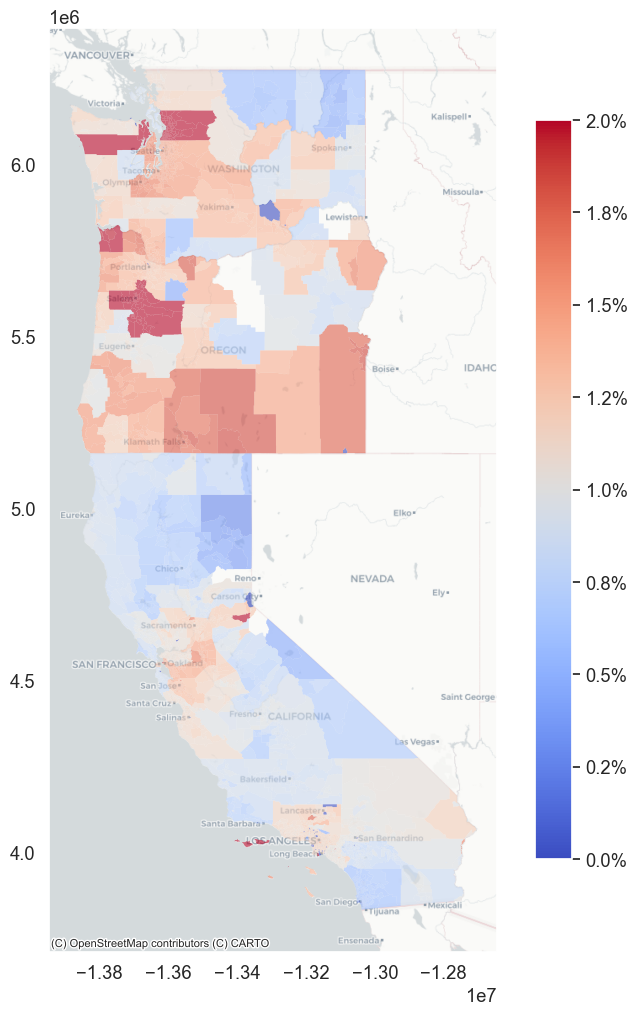

In [19]:
# plot EV penetration change under aggresive scenario
# state_tracts_geojson = \
# us_tracts_geojson.loc[us_tracts_geojson['st_code'] == selected_state]

tracts_with_EV_diff = us_tracts_geojson.merge(ev_penetration_comparison, 
                                            on = 'home_GEOID',
                                            how = 'inner')
tracts_with_EV_diff.loc[:, 'EV_fraction_diff'] *= 100
ax = tracts_with_EV_diff.plot(figsize = (10,12), 
                              column = 'EV_fraction_diff', 
                              cmap='coolwarm',
                            alpha = 0.6, vmin = 0, vmax = 2, 
                              linewidth=0.01, legend=True,
                                legend_kwds = {'shrink': 0.8, 'format': '%.1f%%'})
# tracts_with_EV_diff.plot(ax = ax, facecolor = "none", 
#                          edgecolor='navy', lw=0.03)
cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)
# cx.add_basemap(ax, crs = tracts_with_EV_diff.crs.to_string(),
#                source = cx.providers.Stamen.TonerLite)
# cx.add_basemap(ax, crs = 'EPSG:4326', zoom =8,
#                source = cx.providers.Stamen.TonerLite)
ax.grid(False)
plt.savefig('Plot/PNW/three_states_map_EV_frac_delta_' + \
            output_name_comp + '.png', dpi = 200)

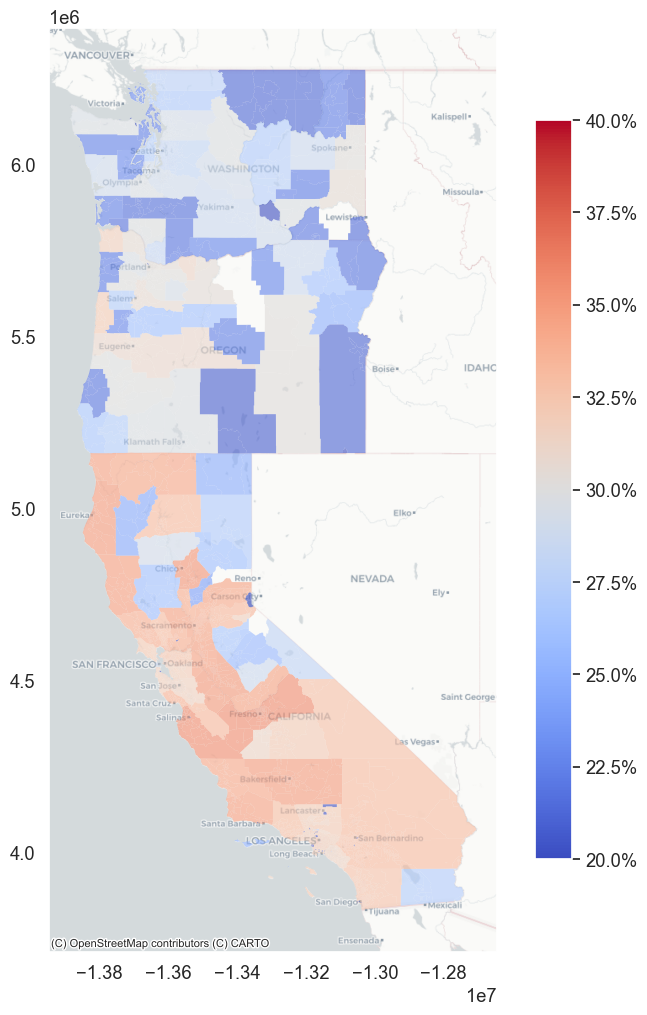

In [20]:
# Plot baseline EV adoption 
tracts_with_EV_diff.loc[:, 'EV_fraction_base'] *= 100
ax = tracts_with_EV_diff.plot(figsize = (10,12), 
                              column = 'EV_fraction_base', 
                              cmap='coolwarm',
                            alpha = 0.6, vmin = 20, vmax = 40, 
                              linewidth=0.01, legend=True,
                                legend_kwds = {'shrink': 0.8, 'format': '%.1f%%'})
# tracts_with_EV_diff.plot(ax = ax, facecolor = "none", 
#                          edgecolor='navy', lw=0.03)
cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)
ax.grid(False)
plt.savefig('Plot/PNW/three_states_map_EV_frac_base_' + \
            output_name_comp + '.png', dpi = 200)

In [35]:
tracts_to_check = tracts_with_EV_diff.loc[tracts_with_EV_diff['st_code'] == 'WA']
# tracts_to_check.cbsaname.unique()
tracts_to_check.loc[tracts_to_check['cbsaname'] == 'Seattle-Tacoma-Bellevue, WA'].head(5)

,GEOID,NAME,geometry,home_GEOID,st_code,cbsa,cbsaname,NEVI_DAC,EV_fraction_base,EV_fraction_alt,EV_fraction_diff
9192,53033000100,"Census Tract 1, King County, Washington","MULTIPOLYGON (((-13613986.332 6062679.700, -13...",53033000100,WA,42660.0,"Seattle-Tacoma-Bellevue, WA",1.0,0.223463,0.234132,1.066940
9193,53033000200,"Census Tract 2, King County, Washington","MULTIPOLYGON (((-13616997.079 6060910.392, -13...",53033000200,WA,42660.0,"Seattle-Tacoma-Bellevue, WA",0.0,0.223339,0.233705,1.036595
9194,53033000300,"Census Tract 3, King County, Washington","MULTIPOLYGON (((-13619406.590 6062736.471, -13...",53033000300,WA,42660.0,"Seattle-Tacoma-Bellevue, WA",0.0,0.223627,0.234756,1.112924
9195,53033000401,"Census Tract 4.01, King County, Washington","MULTIPOLYGON (((-13621156.532 6062738.457, -13...",53033000401,WA,42660.0,"Seattle-Tacoma-Bellevue, WA",1.0,0.223312,0.233979,1.066743
9196,53033000402,"Census Tract 4.02, King County, Washington","MULTIPOLYGON (((-13621158.424 6061238.376, -13...",53033000402,WA,42660.0,"Seattle-Tacoma-Bellevue, WA",1.0,0.223526,0.234220,1.069379


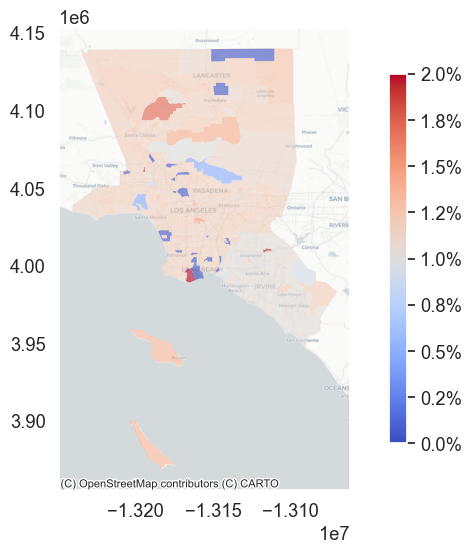

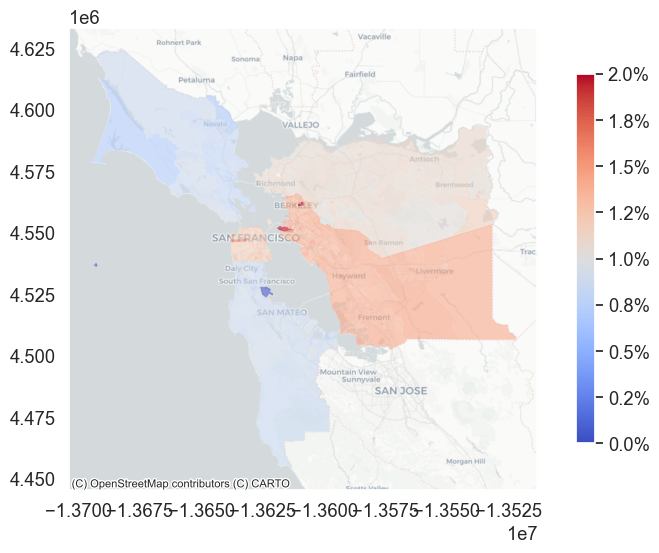

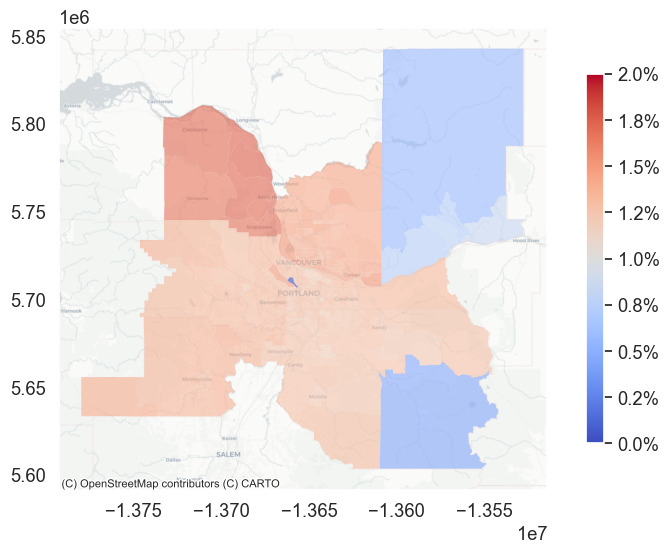

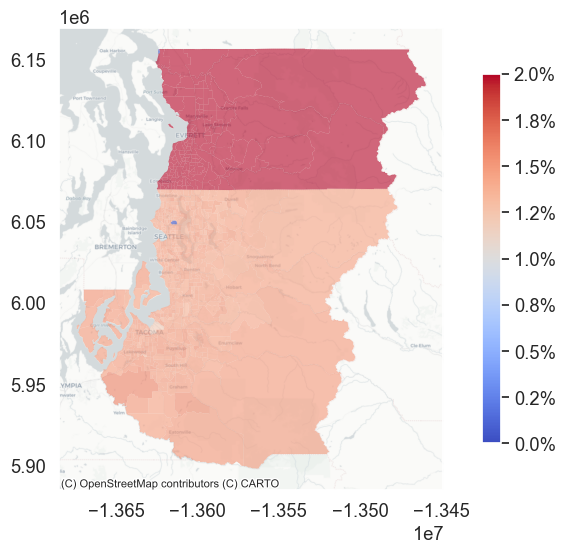

In [15]:
# selected_cbsas = [26420, 19100, 12420] # Houston, Dallas, Austin
selected_cbsas = [31080, 41860, 38900, 42660] # LA, SF, Portland, Seattle
for cbsa in selected_cbsas:
    regional_tracts_with_EV_diff = \
    tracts_with_EV_diff.loc[tracts_with_EV_diff['cbsa'] == cbsa]
    ax = regional_tracts_with_EV_diff.plot(figsize = (10,6), 
                                  column = 'EV_fraction_diff', cmap='coolwarm',
                                alpha = 0.6, vmin = 0, vmax = 2, linewidth=0.01,
                                  legend=True,
                                legend_kwds = {'shrink': 0.8, 'format': '%.1f%%'})
    cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)
    ax.grid(False)
    plt.savefig('Plot/PNW/region_' + str(cbsa) + '_EV_frac_delta_' + output_name_comp + '.png', dpi = 200)

In [16]:
# plot EV VMT penetration change under aggregisve scenario
# select data for plotting
selected_year = 2032
scenario_to_compare = 'NEVI'
# selected_scenario = 'baseline'
output_name_comp = 'year_' + str(selected_year) + '_' + scenario_to_compare

criteria_1 = (EV_VMT_by_scenario['year'] == selected_year) & \
(EV_VMT_by_scenario['type'] == 'Baseline') & (EV_VMT_by_scenario['VMT'] >= 5)
ev_vmt_baseline = EV_VMT_by_scenario.loc[criteria_1]
ev_vmt_baseline = ev_vmt_baseline[['thru_GEOID', 'NEVI_DAC', 'cbsa', 'BEV_VMT_fraction']]
ev_vmt_baseline.columns = ['thru_GEOID', 'DACSTS', 'cbsa', 'BEV_VMT_fraction_base']

criteria_2 = (EV_VMT_by_scenario['year'] == selected_year) & \
(EV_VMT_by_scenario['type'] == scenario_to_compare) & (EV_VMT_by_scenario['VMT'] >= 5)
ev_vmt_scenario = EV_VMT_by_scenario.loc[criteria_2]
ev_vmt_scenario = ev_vmt_scenario[['thru_GEOID', 'BEV_VMT_fraction']]
ev_vmt_scenario.columns = ['thru_GEOID', 'BEV_VMT_fraction_alt']

ev_vmt_comparison = pd.merge(ev_vmt_baseline, ev_vmt_scenario,
                                     on = 'thru_GEOID', how = 'left')

ev_vmt_comparison.loc[:, 'EV_vmt_fraction_diff'] = \
ev_vmt_comparison.loc[:, 'BEV_VMT_fraction_alt'] -\
ev_vmt_comparison.loc[:, 'BEV_VMT_fraction_base']

ev_vmt_comparison.head(4)
# print(ev_penetration_to_plot.columns)
# criteria_2 = (EV_VMT_by_scenario['year'] == selected_year) & (EV_VMT_by_scenario['type'] == selected_scenario)
# ev_vmt_to_plot = EV_VMT_by_scenario.loc[criteria_2]

# ev_vmt_to_plot.head(5)

,thru_GEOID,DACSTS,cbsa,BEV_VMT_fraction_base,BEV_VMT_fraction_alt,EV_vmt_fraction_diff
0,4001942600,1.0,99999,0.308857,0.319270,0.010413
1,4001942700,1.0,99999,0.308764,0.319152,0.010388
2,4001944000,1.0,99999,0.311134,0.321610,0.010477
3,4001944100,1.0,99999,0.309066,0.319486,0.010419


In [18]:
ev_vmt_comparison.to_csv('ev_vmt_comparison.csv')

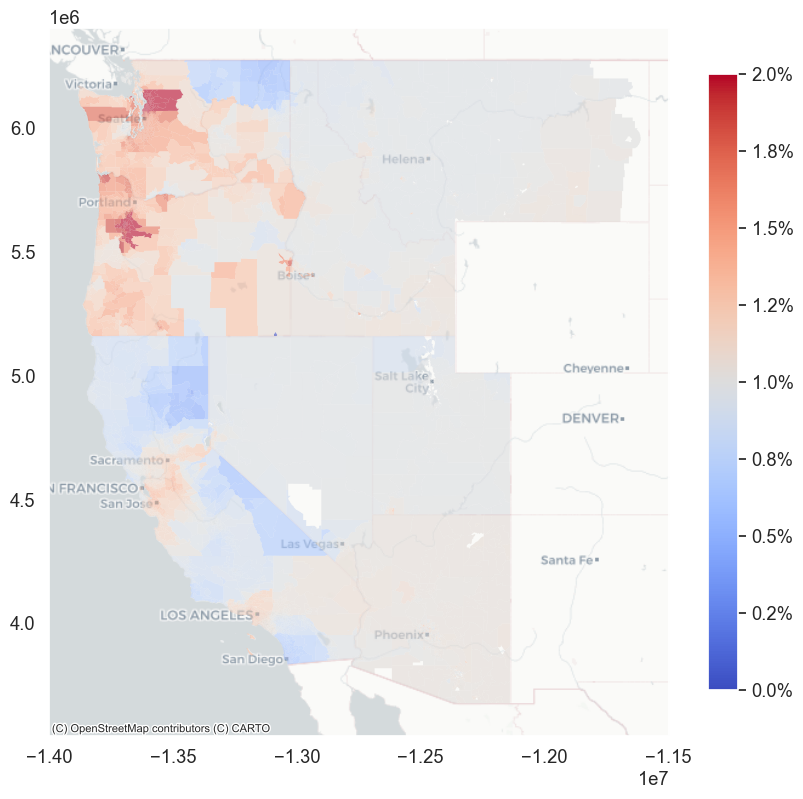

In [21]:
# plot EV VMT penetration change under aggregisve scenario
# state_tracts_geojson = \
# us_tracts_geojson.loc[us_tracts_geojson['st_code'] == selected_state]

tracts_with_EV_diff = us_tracts_geojson.merge(ev_vmt_comparison,
                                                 left_on = 'home_GEOID',
                                                 right_on = 'thru_GEOID',
                                                 how = 'inner')
tracts_with_EV_diff.loc[:, 'EV_vmt_fraction_diff'] *= 100
# dac_boundary = CA_tracts_with_EV_diff.loc[CA_tracts_with_EV_diff['DACSTS'] == 1]
ax = tracts_with_EV_diff.plot(figsize = (10,10), 
                              column = 'EV_vmt_fraction_diff', cmap='coolwarm',
                              alpha = 0.6, vmin = 0, vmax = 2, linewidth=0.01,
                              legend=True,
                              legend_kwds = {'shrink': 0.8, 'format': '%.1f%%'})
cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)
ax.grid(False)
plt.savefig('Plot/PNW/three_states_map_EV_VMT_frac_delta_' + \
            output_name_comp + '.png', dpi = 200)

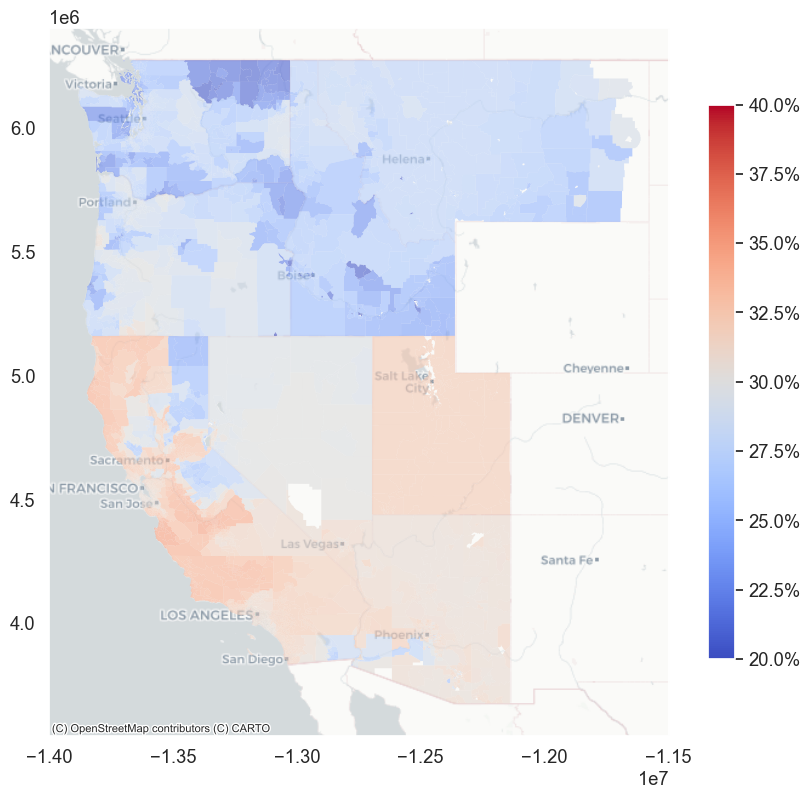

In [28]:
# Plot baseline EV VMT penetration 
#tracts_with_EV_diff.loc[:, 'BEV_VMT_fraction_base'] *= 100
ax = tracts_with_EV_diff.plot(figsize = (10,12), 
                              column = 'BEV_VMT_fraction_base', 
                              cmap='coolwarm',
                            alpha = 0.6, vmin = 20, vmax = 40, 
                              linewidth=0.01, legend=True,
                                legend_kwds = {'shrink': 0.6, 'format': '%.1f%%'})
# tracts_with_EV_diff.plot(ax = ax, facecolor = "none", 
#                          edgecolor='navy', lw=0.03)
cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)
ax.grid(False)
plt.savefig('Plot/PNW/three_states_map_EV_VMT_frac_base_' + \
            output_name_comp + '.png', dpi = 200)

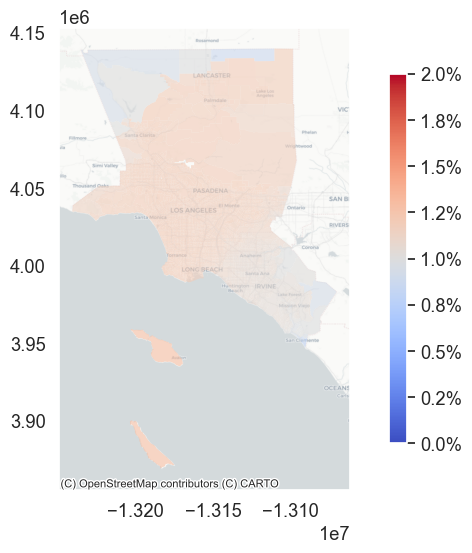

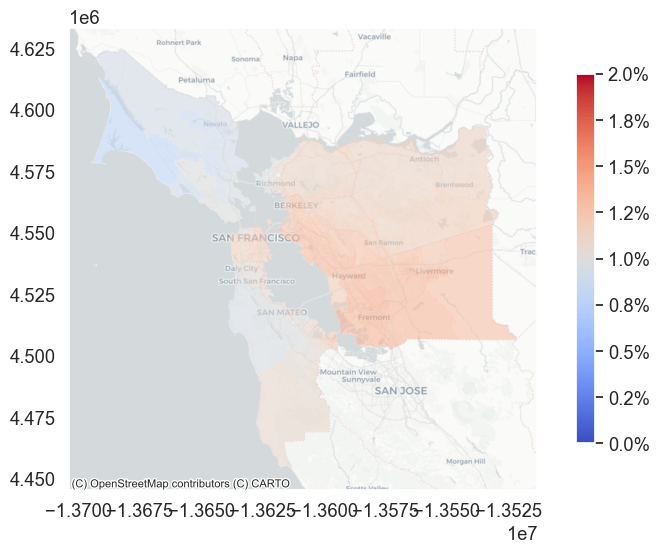

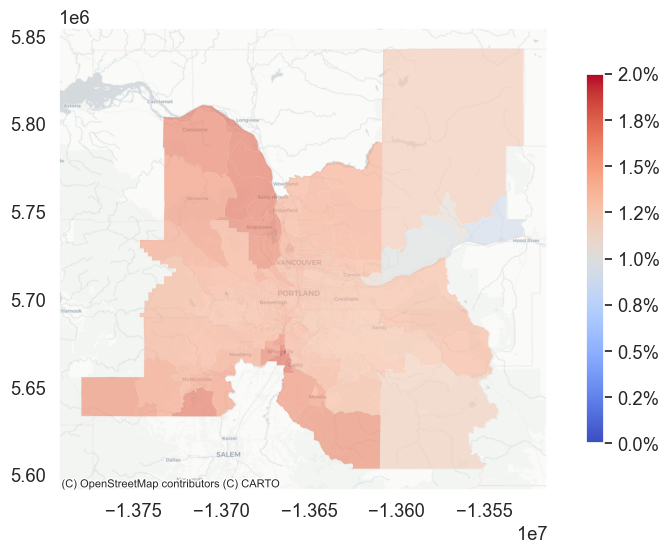

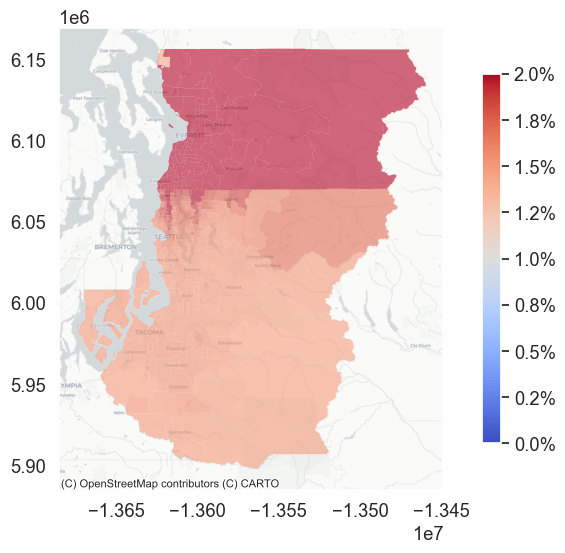

In [26]:
# plot EV VMT penetration change under aggregisve scenario - LA Region
# selected_cbsas = [26420, 19100, 12420] # Houston, Dallas, Austin
selected_cbsas = [31080, 41860, 38900, 42660] # LA, SF, Portland, Seattle
for cbsa in selected_cbsas:
    regional_tracts_with_EV_diff = \
    tracts_with_EV_diff.loc[tracts_with_EV_diff['cbsa'] == cbsa]
    ax = regional_tracts_with_EV_diff.plot(figsize = (10,6), 
                                  column = 'EV_vmt_fraction_diff', cmap='coolwarm',
                                alpha = 0.6, vmin = 0, vmax = 2, linewidth=0.01,
                                  legend=True,
                                legend_kwds = {'shrink': 0.8, 'format': '%.1f%%'})
    cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)
    ax.grid(False)
    plt.savefig('Plot/PNW/region_' + str(cbsa) + \
                '_EV_VMT_frac_delta_' + output_name_comp + '.png', dpi = 200)

In [18]:
cx.__version__

'1.4.0'